## import

In [230]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager,rc
rc('font', family='AppleGothic')

# DATA

## building info
- 100개 건물 정보
- 건물 번호, 건물 유형, 연면적, 냉방 면적, 태양광 용량, ESS 저장 용량, PCS 용량

### DATA 불러오기


In [223]:
building_info = pd.read_csv('input/building_info.csv')
display(building_info)
print(building_info.info())

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB
None


### type 변환
- 기존 `object`인 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW) 컬럼을 `float64`로 변환한다.

In [224]:
building_info = building_info.replace('-',0)
building_info[['태양광용량(kW)','ESS저장용량(kWh)','PCS용량(kW)']] = building_info[['태양광용량(kW)','ESS저장용량(kWh)','PCS용량(kW)']].astype('float')
display(building_info)
print(building_info.info())

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,0.0,0.0,0.0
1,2,건물기타,122233.47,99000.00,0.0,0.0,0.0
2,3,건물기타,171243.00,113950.00,40.0,0.0,0.0
3,4,건물기타,74312.98,34419.62,60.0,0.0,0.0
4,5,건물기타,205884.00,150000.00,0.0,2557.0,1000.0
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,0.0,0.0,0.0
96,97,호텔및리조트,55144.67,25880.00,0.0,0.0,0.0
97,98,호텔및리조트,53578.62,17373.75,0.0,0.0,0.0
98,99,호텔및리조트,53499.00,40636.00,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    float64
 5   ESS저장용량(kWh)  100 non-null    float64
 6   PCS용량(kW)     100 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB
None


### EDA

#### 기본 정보
- 100개의 건물
- 12가지 건물 유형
>건물기타       15\
공공          8\
대학교         8\
백화점및아울렛     8\
병원          8\
상용          8\
아파트         8\
연구소         8\
지식산업센터      8\
할인마트        8\
호텔및리조트      8\
데이터센터       5

- 태양광용량(kW) : 태양광 발전 설비가 설치된 건물 36개소
> 태양광을 사용하여 전력을 생산할 수 있는 능력


- ESS 시스템 : ESS저장용량(kWh) + PCS(Power Conversion System)이 설치된 건물 5개소
    - ESS저장용량(kWh) (ESS시스템 베터리 용량)
>생산된 전기에너지를 저장하여 전력 이 필요한 시기에 사용할 수 있게 하는 에너지 솔루션
    - PCS(Power Conversion System): ESS 내 전력변환장치 
> PCS는 저장된 에너지를 효율적으로 변환하고 제어하는 역할\
PCS의 용량은 ESS에서 저장된 에너지를 공급할 수 있는 능력을 나타낸다

\* 태양광 발전 설비와 ESS 시스템이 모두 설치된 건물: 2개소

In [225]:
# 건물수
print(f'건물수: {len(building_info.건물번호.unique())}개',end='\n\n')

# 건물유형
print(f'건물유형 {len(building_info.건물유형.value_counts())}가지: \n{building_info.건물유형.value_counts()}',end='\n\n')

# 태양광 발전 설비가 설치된 건물 36개소 
print(f"태양광 발전 설비가 설치된 건물: {len(building_info[building_info['태양광용량(kW)'] != 0])}개소", end='\n\n')

# ESS 시스템이 설치된 건물 
print(f"ESS 시스템이 설치된 건물: {len(building_info[building_info[['ESS저장용량(kWh)', 'PCS용량(kW)']].sum(axis=1) != 0])}개소", end='\n\n')

# 태양광 발전 설비와 ESS 시스템이 모두 설치된 건물
print(f"태양광 발전 설비와 ESS시스템이 모두 설치된 건물: {len(building_info[(building_info['태양광용량(kW)'] != 0) & (building_info[['ESS저장용량(kWh)', 'PCS용량(kW)']].sum(axis=1) != 0)])}개소", end='\n\n')

건물수: 100개

건물유형 12가지: 
건물기타       15
공공          8
대학교         8
백화점및아울렛     8
병원          8
상용          8
아파트         8
연구소         8
지식산업센터      8
할인마트        8
호텔및리조트      8
데이터센터       5
Name: 건물유형, dtype: int64

태양광 발전 설비가 설치된 건물: 36개소

ESS 시스템이 설치된 건물: 5개소

태양광 발전 설비와 ESS시스템이 모두 설치된 건물: 2개소



#### 태양광
- 태양광발전설비 설치 비율

In [226]:
building_info[building_info['태양광용량(kW)'] != 0]

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
2,3,건물기타,171243.000,113950.00,40.00,0.0,0.0
3,4,건물기타,74312.980,34419.62,60.00,0.0,0.0
10,11,건물기타,45956.560,13190.98,447.20,0.0,0.0
11,12,건물기타,70163.100,3598.21,130.60,0.0,0.0
13,14,건물기타,16844.160,14102.92,56.00,0.0,0.0
15,16,공공,240038.000,95175.00,20.00,0.0,0.0
17,18,공공,75624.560,39915.10,64.80,0.0,0.0
20,21,공공,61469.670,43970.64,70.00,837.1,500.0
21,22,공공,61375.470,19800.00,110.00,0.0,0.0
23,24,대학교,659696.910,516097.85,97.65,0.0,0.0


In [227]:
building_info[building_info['태양광용량(kW)'] != 0]['태양광용량(kW)'].mean()

99.10666666666665

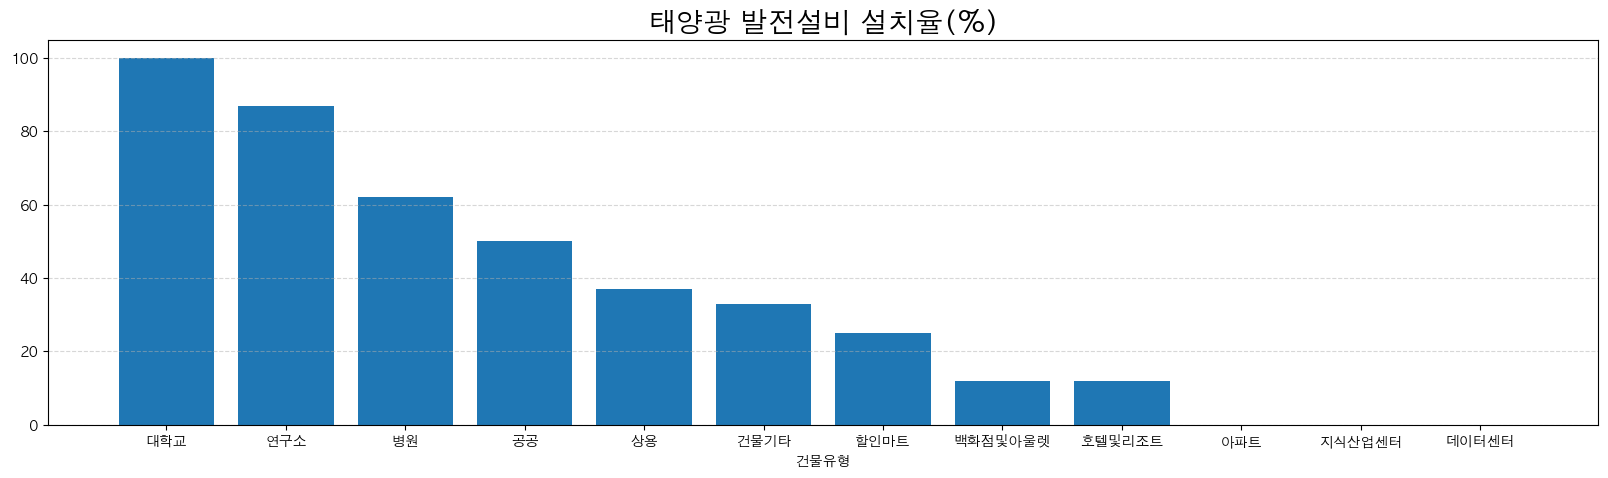

In [270]:
building_type = building_info.value_counts('건물유형')
building_type = building_type.reset_index()
building_type = building_type.rename(columns={0:'건물수'})
building_type_solar = building_info[building_info['태양광용량(kW)'] != 0].value_counts('건물유형')
building_type_solar = building_type_solar.reset_index()
building_type_solar = building_type_solar.rename(columns={0:'태양광 발전설비 설치'})
building_type_solar_rate = building_type.merge(building_type_solar, how='outer', on='건물유형')
building_type_solar_rate = building_type_solar_rate.replace(np.nan,0)
building_type_solar_rate = building_type_solar_rate.set_index('건물유형')
building_type_solar_rate['태양광 발전설비 설치율(%)'] = (building_type_solar_rate['태양광 발전설비 설치'] / building_type_solar_rate['건물수'])*100
building_type_solar_rate = building_type_solar_rate.sort_values(['태양광 발전설비 설치율(%)'], ascending=False)
building_type_solar_rate = building_type_solar_rate.astype('int')
building_type_solar_rate


plt.figure(figsize=(20,5))
plt.bar(building_type_solar_rate.index, building_type_solar_rate['태양광 발전설비 설치율(%)'])
plt.title('태양광 발전설비 설치율(%)', size = 20, weight='bold')
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.xlabel('건물유형')
plt.show()

#### ESS 시스템의 최대 가용시간
- ESS 시스템의 최대 가용시간이 2.7시간으로 나타났다.
- 이는 전력 공금의 차질이 있을 경우 에너지 공급 안정성 향상을 위한 설비로 보인다.

In [254]:
building_info['ESS시스템 최대 가용시간(hr)'] = building_info['ESS저장용량(kWh)'] / building_info['PCS용량(kW)']
building_info = building_info.replace(np.nan,0)
display(building_info[building_info[['ESS저장용량(kWh)', 'PCS용량(kW)']].sum(axis=1) != 0])

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),ESS시스템 최대 가용시간(hr)
4,5,건물기타,205884.00,150000.00,0.0,2557.0,1000.0,2.557000
6,7,건물기타,101711.52,41341.10,0.0,800.0,300.0,2.666667
18,19,공공,90730.40,90730.00,0.0,1362.0,500.0,2.724000
20,21,공공,61469.67,43970.64,70.0,837.1,500.0,1.674200
70,71,연구소,90896.00,44536.00,65.0,3100.0,800.0,3.875000


In [255]:
print(f"ESS시스템 최대 가용시간(hr): {building_info[building_info[['ESS저장용량(kWh)', 'PCS용량(kW)']].sum(axis=1) != 0]['ESS시스템 최대 가용시간(hr)'].mean().round(2)}시간")

ESS시스템 최대 가용시간(hr): 2.7시간


## train_df
- train 데이터 : 100개 건물들의 2022년 06월 01일부터 2022년 08월 24일까지의 데이터
- 일시별 기온, 강수량, 풍속, 습도, 일조, 일사 정보 포함
- 전력사용량(kWh) 포함

In [200]:
train_df = pd.read_csv('input/train.csv')
train_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


## test_df
- test 데이터 : 100개 건물들의 2022년 08월 25일부터 2022년 08월 31일까지의 데이터
- 일시별 기온, 강수량, 풍속, 습도의 예보 정보

In [202]:
test_df = pd.read_csv('input/test.csv')
test_df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [ ]:
>>> date_index = pd.date_range('1/1/2010', periods=6, freq='D')
>>> df2 = pd.DataFrame({"prices": [100, 101, np.nan, 100, 89, 88]},
...                    index=date_index)